In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import tensorflow as tf 
from tensorflow import keras
import sklearn 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow.keras import layers
!pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 97 kB 6.9 MB/s 


In [7]:
df = pd.read_csv("/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
387250,1348552920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387251,1348552980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387252,1348553040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387253,1348553100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')
df = df.set_index('Timestamp')
df['price'] = (df['High']+ df['Low'])/2
df = df.resample('6H').mean()
df = df.dropna()
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,price
Timestamp,,,,,,,,
2011-12-31 06:00:00,4.390000,4.390000,4.390000,4.390000,0.455581,2.000000,4.390000,4.390000
2011-12-31 12:00:00,4.490000,4.513333,4.490000,4.513333,31.620766,141.106779,4.498804,4.501667
2012-01-01 00:00:00,4.580000,4.580000,4.580000,4.580000,1.502000,6.879160,4.580000,4.580000
2012-01-01 12:00:00,4.840000,4.840000,4.840000,4.840000,10.000000,48.400000,4.840000,4.840000
2012-01-01 18:00:00,5.000000,5.000000,5.000000,5.000000,10.100000,50.500000,5.000000,5.000000
...,...,...,...,...,...,...,...,...
2012-09-24 00:00:00,11.982500,11.982500,11.982500,11.982500,3.818030,45.763916,11.982500,11.982500
2012-09-24 06:00:00,11.890000,11.890000,11.886216,11.886216,12.016932,142.756356,11.888366,11.888108
2012-09-24 12:00:00,11.849306,11.849583,11.846667,11.846944,9.240670,109.201198,11.848112,11.848125


In [9]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,price
Timestamp,,,,,,,,
2011-12-31 06:00:00,4.39,4.390000,4.39,4.390000,0.455581,2.000000,4.390000,4.390000
2011-12-31 12:00:00,4.49,4.513333,4.49,4.513333,31.620766,141.106779,4.498804,4.501667
2012-01-01 00:00:00,4.58,4.580000,4.58,4.580000,1.502000,6.879160,4.580000,4.580000
2012-01-01 12:00:00,4.84,4.840000,4.84,4.840000,10.000000,48.400000,4.840000,4.840000
2012-01-01 18:00:00,5.00,5.000000,5.00,5.000000,10.100000,50.500000,5.000000,5.000000


In [10]:
df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,price
Timestamp,,,,,,,,
2012-09-24 00:00:00,11.982500,11.982500,11.982500,11.982500,3.818030,45.763916,11.982500,11.982500
2012-09-24 06:00:00,11.890000,11.890000,11.886216,11.886216,12.016932,142.756356,11.888366,11.888108
2012-09-24 12:00:00,11.849306,11.849583,11.846667,11.846944,9.240670,109.201198,11.848112,11.848125
2012-09-24 18:00:00,11.916250,11.916250,11.915625,11.915625,7.972929,94.951336,11.915979,11.915937
2012-09-25 00:00:00,11.874286,11.874643,11.870714,11.871071,14.658002,173.633332,11.872008,11.872679


In [11]:
prediction_days = 500
df_train= df['price'][:len(df['price'])-prediction_days].values.reshape(-1,1)
df_test= df['price'][len(df['price'])-prediction_days:].values.reshape(-1,1)

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)
scaled_train
scaled_test

array([[1.87237828e-03],
       [8.03640622e-04],
       [2.18727420e-03],
       [4.03211896e-03],
       [2.72402860e-03],
       [4.87820294e-03],
       [1.97257244e-03],
       [5.66393606e-03],
       [6.48130943e-03],
       [7.31626073e-03],
       [5.47936788e-03],
       [5.60461057e-03],
       [5.47936788e-03],
       [4.97839710e-03],
       [4.81140684e-03],
       [5.47936788e-03],
       [3.47548477e-03],
       [3.47548477e-03],
       [4.47742632e-03],
       [4.04802280e-03],
       [0.00000000e+00],
       [3.14150425e-03],
       [4.14344580e-03],
       [4.47742632e-03],
       [4.47742632e-03],
       [3.80946528e-03],
       [2.64053347e-03],
       [3.91751781e-03],
       [2.12179777e-03],
       [5.19309886e-03],
       [4.22694093e-03],
       [7.63354222e-03],
       [7.75650777e-03],
       [9.38693994e-03],
       [1.00596721e-02],
       [8.48519254e-03],
       [1.10902406e-02],
       [1.00954558e-02],
       [1.43298516e-02],
       [1.58456093e-02],


In [12]:
def create_dataset(dataset, look_back=30):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

trainX, trainY = create_dataset(scaled_train)
testX, testY = create_dataset(scaled_test)

In [13]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
testX

array([[[0.00187238, 0.00080364, 0.00218727, ..., 0.00391752,
         0.0021218 , 0.0051931 ]],

       [[0.00080364, 0.00218727, 0.00403212, ..., 0.0021218 ,
         0.0051931 , 0.00422694]],

       [[0.00218727, 0.00403212, 0.00272403, ..., 0.0051931 ,
         0.00422694, 0.00763354]],

       ...,

       [[0.67219991, 0.67106079, 0.67199675, ..., 0.6882263 ,
         0.69606758, 0.68661007]],

       [[0.67106079, 0.67199675, 0.67657147, ..., 0.69606758,
         0.68661007, 0.68260399]],

       [[0.67199675, 0.67657147, 0.67498726, ..., 0.68661007,
         0.68260399, 0.68939841]]])

In [14]:
def model_builder(hp):
    model = Sequential()
    model.add(tf.keras.layers.LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32), return_sequences=True, input_shape= ( trainX.shape[1], trainX.shape[2])))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(tf.keras.layers.LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(tf.keras.layers.LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32)))
    model.add(tf.keras.layers.Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.05)))
    model.add(layers.Dense(30, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
    model.add(tf.keras.layers.Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.05)))
    model.add(layers.Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
   
    model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
    
    return model
    
tuner = kt.RandomSearch(model_builder, objective="mse", max_trials = 3, executions_per_trial =1,directory = "./")

tuner.search(x=trainX, y=trainY, epochs = 150, batch_size =128, validation_data=(testX, testY), shuffle=False)

Trial 3 Complete [00h 00m 44s]
mse: 0.004962362814694643

Best mse So Far: 0.0031757657416164875
Total elapsed time: 00h 02m 42s
INFO:tensorflow:Oracle triggered exit


In [15]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='mse', direction='min')
Trial summary
Hyperparameters:
input_unit: 224
n_layers: 3
lstm_0_units: 64
layer_2_neurons: 64
Dropout_rate: 0.15000000000000002
dense_activation: relu
lstm_1_units: 32
lstm_2_units: 32
Score: 0.0031757657416164875
Trial summary
Hyperparameters:
input_unit: 256
n_layers: 1
lstm_0_units: 160
layer_2_neurons: 384
Dropout_rate: 0.4
dense_activation: sigmoid
lstm_1_units: 448
lstm_2_units: 448
Score: 0.004962362814694643
Trial summary
Hyperparameters:
input_unit: 96
n_layers: 3
lstm_0_units: 320
layer_2_neurons: 192
Dropout_rate: 0.4
dense_activation: sigmoid
lstm_1_units: 480
lstm_2_units: 64
Score: 0.007314928807318211


In [16]:
best_model = tuner.get_best_models(num_models=1)[0]

In [17]:
history = best_model.fit(x=trainX, y=trainY, epochs = 150, batch_size =128, validation_data=(testX, testY), shuffle=False, verbose=0)

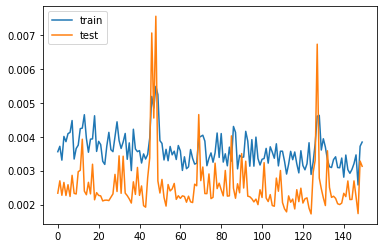

In [18]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [19]:
predicted_BTC_price = best_model.predict(testX)

In [20]:
predicted_BTC_price = scaler_test.inverse_transform(predicted_BTC_price.reshape(-1, 1))

In [21]:
true = scaler_test.inverse_transform(testY.reshape(-1, 1))

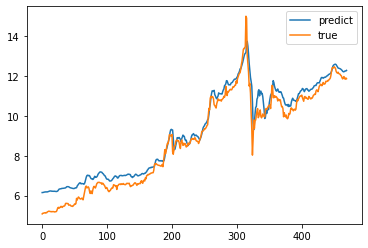

In [22]:
pyplot.plot(predicted_BTC_price, label='predict')
pyplot.plot(true, label='true')
pyplot.legend()
pyplot.show()